## Challenge: Identifying the type of toxicity in the comments for Jigsaw, Google

#### Building a multi-headed model that’s capable of detecting different types of of toxicity like threats, obscenity, insults, and identity-based hate better than Perspective’s current models.

#### The dataset is of comments from Wikipedia’s talk page edits. 

#### Improvements to the current model will hopefully help online discussion become more productive and respectful.

### This notebook is for supporting Jigsaw:

https://jigsaw.google.com/

Jigsaw is a unit within Google that explores threats to open societies, and builds technology that inspires scalable solutions.

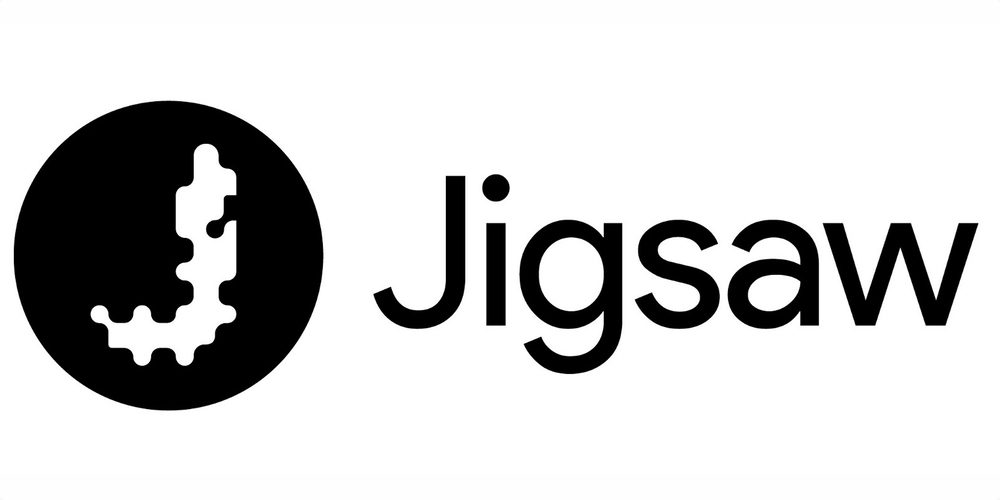

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip


In [2]:
import zipfile

sample_submission_zip = "../input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip"
test_zip = "../input/jigsaw-toxic-comment-classification-challenge/test.csv.zip"
train_zip = "../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip"
test_labels_zip = "../input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip"

for file in [sample_submission_zip, test_zip, train_zip, test_labels_zip]:
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall('./input/csv_files/')
    zip_ref.close()

In [3]:
print(os.listdir('./input/csv_files/'))

train = pd.read_csv("./input/csv_files/train.csv")
test = pd.read_csv("./input/csv_files/test.csv")
test_labels = pd.read_csv("./input/csv_files/test_labels.csv")
sample_submission = pd.read_csv("./input/csv_files/sample_submission.csv")

['train.csv', 'sample_submission.csv', 'test_labels.csv', 'test.csv']


In [4]:
train.head(20)

id                                       comment_text  \
0   0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1   000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2   000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3   0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4   0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5   00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6   0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7   00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8   00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9   00040093b2687caa  alignment on this subject and which are contra...   
10  0005300084f90edc  "\nFair use rationale for Image:Wonju.jpg\n\nT...   
11  00054a5e18b50dd4  bbq \n\nbe a man and lets discuss it-maybe ove...   
12  0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
13  0006f16e4e9f292e  Before you start throwing accusations and warn...   
14  00070ef96486d6f9  Oh, and the girl above started her arguments w...   
15  00078f8ce7eb276d  "\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...   
16  0007e25b2121310b  Bye! \n\nDon't look, come or think of comming ...   
17  000897889268bc93   REDIRECT Talk:Voydan Pop Georgiev- Chernodrinski   
18  0009801bd85e5806  The Mitsurugi point made no sense - why not ar...   
19  0009eaea3325de8c  Don't mean to bother you \n\nI see that you're...   

    toxic  severe_toxic  obscene  threat  insult  identity_hate  
0       0             0        0       0       0              0  
1       0             0        0       0       0              0  
2       0             0        0       0       0              0  
3       0             0        0       0       0              0  
4       0             0        0       0       0              0  
5       0             0        0       0       0              0  
6       1             1        1       0       1              0  
7       0             0        0       0       0              0  
8       0             0        0       0       0              0  
9       0             0        0       0       0              0  
10      0             0        0       0       0              0  
11      0             0        0       0       0              0  
12      1             0        0       0       0              0  
13      0             0        0       0       0              0  
14      0             0        0       0       0              0  
15      0             0        0       0       0              0  
16      1             0        0       0       0              0  
17      0             0        0       0       0              0  
18      0             0        0       0       0              0  
19      0             0        0       0       0              0

In [12]:
train.iloc[2]["comment_text"]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [13]:
test.head(5)

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [14]:
test_labels.head(5)

id  toxic  severe_toxic  obscene  threat  insult  \
0  00001cee341fdb12     -1            -1       -1      -1      -1   
1  0000247867823ef7     -1            -1       -1      -1      -1   
2  00013b17ad220c46     -1            -1       -1      -1      -1   
3  00017563c3f7919a     -1            -1       -1      -1      -1   
4  00017695ad8997eb     -1            -1       -1      -1      -1   

   identity_hate  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1

In [15]:
sample_submission.head(5)

id  toxic  severe_toxic  obscene  threat  insult  \
0  00001cee341fdb12    0.5           0.5      0.5     0.5     0.5   
1  0000247867823ef7    0.5           0.5      0.5     0.5     0.5   
2  00013b17ad220c46    0.5           0.5      0.5     0.5     0.5   
3  00017563c3f7919a    0.5           0.5      0.5     0.5     0.5   
4  00017695ad8997eb    0.5           0.5      0.5     0.5     0.5   

   identity_hate  
0            0.5  
1            0.5  
2            0.5  
3            0.5  
4            0.5

In [16]:
print(train.shape)
print(test.shape)

(159571, 8)
(153164, 2)


In [17]:
# check for nulls
print(train.isnull().any(), "\n")
print(test_labels.isnull().any())

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool 

id               False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool


In [18]:
for col_name in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    print("For", col_name, '\n')
    print(train[col_name].value_counts())
    print("\n")

For toxic 

0    144277
1     15294
Name: toxic, dtype: int64


For severe_toxic 

0    157976
1      1595
Name: severe_toxic, dtype: int64


For obscene 

0    151122
1      8449
Name: obscene, dtype: int64


For threat 

0    159093
1       478
Name: threat, dtype: int64


For insult 

0    151694
1      7877
Name: insult, dtype: int64


For identity_hate 

0    158166
1      1405
Name: identity_hate, dtype: int64




## Method 1:  Using Keras LSTM

In [19]:
import sys, os, re, csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Keras imports**

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Dense, Dropout, Input, LSTM, Embedding, Activation
from keras.layers import GlobalMaxPool1D, Bidirectional
from keras.models import Model

from keras import initializers, optimizers, regularizers, constraints, layers

<b><li> We cannot remove punctuations (like quotes, exclamation mark), special characters(@*%) or digits since those are key in identifying toxic words. 
<br><li> We also cannot lower case words as uppercase might indicate comments written in anger or frustration 
<br><li> So we will just remove the essential english stop-words </b>

In [21]:
import spacy
# removing some functions from nlp since we have over 1 lakh comments and that would take up a lot of time
nlp = spacy.load("en_core_web_lg", disable=["parser", "tagger", "ner"])

def clean_text(text):
    
    # Processing text with the nlp object returns a Doc object that holds all information about the tokens, 
    # their linguistic features and their relationships.
    doc = nlp(text)
    
    # getting tokens, lemmatizing words and eliminating basic english stop-words
    tokens=[token.lemma_.strip() for token in doc if 
            not token.is_stop and not nlp.vocab[token.lemma_].is_stop
            ] # Removing only StopWords
        
    # Recreation of the text
    text=" ".join(tokens)

    # Returning the text
    return text


train["comment_text"] = train["comment_text"].apply(lambda x: clean_text(x))
test["comment_text"] = test["comment_text"].apply(lambda x: clean_text(x))

train.head(20)

id                                       comment_text  \
0   0000997932d777bf  Explanation  edit username Hardcore Metallica ...   
1   000103f0d9cfb60f  D'aww ! match background colour seemingly stic...   
2   000113f07ec002fd  Hey man , try edit war . guy constantly remove...   
3   0001b41b1c6bb37e  "   real suggestion improvement - wonder secti...   
4   0001d958c54c6e35              , sir , hero . chance remember page ?   
5   00025465d4725e87          "  Congratulations , use tool .  · talk "   
6   0002bcb3da6cb337                               COCKSUCKER PISS WORK   
7   00031b1e95af7921  vandalism Matt Shirvington article revert .  ,...   
8   00037261f536c51d  Sorry word ' nonsense ' offensive . , intend w...   
9   00040093b2687caa               alignment subject contrary DuLithgow   
10  0005300084f90edc  "  Fair use rationale Image : Wonju.jpg  Thank...   
11  00054a5e18b50dd4               bbq  man let discuss - maybe phone ?   
12  0005c987bdfc9d4b  Hey ... ..  @ | talk .  ... exclusive group WP...   
13  0006f16e4e9f292e  start throw accusation warning , let review ed...   
14  00070ef96486d6f9  Oh , girl start argument . stick nose belong ....   
15  00078f8ce7eb276d  "  Juelz Santanas Age  2002 , Juelz Santana 18...   
16  0007e25b2121310b        Bye !  look , come think comming ! Tosser .   
17  000897889268bc93  REDIRECT Talk : Voydan Pop Georgiev- Chernodri...   
18  0009801bd85e5806  Mitsurugi point sense - argue include Hindi Ry...   
19  0009eaea3325de8c  mean bother  write remove post oh acctually di...   

    toxic  severe_toxic  obscene  threat  insult  identity_hate  
0       0             0        0       0       0              0  
1       0             0        0       0       0              0  
2       0             0        0       0       0              0  
3       0             0        0       0       0              0  
4       0             0        0       0       0              0  
5       0             0        0       0       0              0  
6       1             1        1       0       1              0  
7       0             0        0       0       0              0  
8       0             0        0       0       0              0  
9       0             0        0       0       0              0  
10      0             0        0       0       0              0  
11      0             0        0       0       0              0  
12      1             0        0       0       0              0  
13      0             0        0       0       0              0  
14      0             0        0       0       0              0  
15      0             0        0       0       0              0  
16      1             0        0       0       0              0  
17      0             0        0       0       0              0  
18      0             0        0       0       0              0  
19      0             0        0       0       0              0

In [22]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

all_train_classes_values = train[list_classes].values

list_sentences_train = train["comment_text"]
list_sentences_test = test["comment_text"]

In [23]:
list_sentences_train

0         Explanation  edit username Hardcore Metallica ...
1         D'aww ! match background colour seemingly stic...
2         Hey man , try edit war . guy constantly remove...
3         "   real suggestion improvement - wonder secti...
4                     , sir , hero . chance remember page ?
                                ...                        
159566    " : : : : : 2 time ask , view completely contr...
159567    ashamed  horrible thing talk page .  128.61.19.93
159568    Spitzer  Umm , s actual article prostitution r...
159569      look like actually speedy version delete look .
159570    "  ... think understand .  come idea bad right...
Name: comment_text, Length: 159571, dtype: object

**Pre-processing of words in comments to feed it to the LSTM model**

1. Tokenization
2. Indexing
3. Index Representation - Getting sentence of indexed words

So this is what we are going to do:

<li><b>Tokenization</b> - We need to break down the sentence into unique words. For eg, "I love cats and love dogs" will become ["I","love","cats","and","dogs"]
    <br><li><b>Indexing</b> - We put the words in a dictionary-like structure and give them an index each For eg, {1:"I",2:"love",3:"cats",4:"and",5:"dogs"}
        <br><li><b>Index Representation</b>- We could represent the sequence of words in the comments in the form of index, and feed this chain of index into our LSTM. For eg, [1,2,3,4,2,5]

In [24]:
from keras.preprocessing.text import Tokenizer

# Intialize the Tokenizer by specifying the maximum number of unique words it can take for forming the dictionary 
max_features = 20000

# Intialize tokenizer object
tokenizer = Tokenizer(num_words = max_features)

# Fit tokenizer on the list of train comments
tokenizer.fit_on_texts(list(list_sentences_train))

# Get tokenized words
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [25]:
count = 0

for i in list_tokenized_train:
    if count <= 5:
        print(i)
        print("\n")
    count += 1 

[405, 4, 474, 3554, 9348, 585, 50, 9349, 5143, 1925, 372, 44, 941, 16701, 2189, 23, 143, 5, 2, 2175, 7520, 2401, 3607, 1762, 747]


[821, 359, 2124, 3589, 698, 41, 5, 576, 2076, 738, 394, 6785, 82]


[234, 176, 40, 4, 106, 200, 1775, 23, 314, 30, 5, 4, 203, 5, 2, 215, 566, 525, 288]


[180, 545, 1130, 439, 38, 2019, 201, 2689, 268, 2402, 344, 8, 52, 17, 4530, 1122, 566, 1664, 173, 566, 175, 201, 2020, 566, 135, 52, 18, 81, 9, 136, 4387, 1, 126, 389, 1392, 1824, 505, 31, 314, 284, 2822, 3, 26, 1, 13951, 3342]


[1309, 2363, 728, 367, 2]


[2556, 15, 902, 675, 5]




In [26]:
# Summary of word counts
from more_itertools import take

take(10, tokenizer.word_counts.items())

[('explanation', 2060),
 ('edit', 39955),
 ('username', 1824),
 ('hardcore', 167),
 ('metallica', 38),
 ('fan', 1489),
 ('revert', 10024),
 ('vandalisms', 38),
 ('closure', 98),
 ('gas', 385)]

In [27]:
# Indices associated with words

take(10,tokenizer.word_index.items())

[('article', 1),
 ('page', 2),
 ('wikipedia', 3),
 ('edit', 4),
 ('talk', 5),
 ("'", 6),
 ('like', 7),
 ('think', 8),
 ('know', 9),
 ('source', 10)]

In [28]:
len(tokenizer.word_counts)

179475

#### By using stop word removal we reduced the noise in the data from a total 210337 words to 173827
#### That is the noise reduction was done by 17.35%

As we can observe all sequences/statements are of different length so we need <b>Padding</b> and <b> Shortening </b> of very long sentences.
<br><br> This needs to be done to get all sentences of equal length so that they could be later fed to an LSTM model. Also, we cannot pad to maximum length sentence since that would create a highly sparse matrix and we cannot shorten it to very short lengths because that would lead us lose information and thus affect accuracy.

(array([5.2439e+04, 4.1362e+04, 2.2255e+04, 1.2641e+04, 7.6480e+03,
        5.1920e+03, 3.6630e+03, 2.7540e+03, 2.1540e+03, 1.5110e+03,
        1.1200e+03, 8.9400e+02, 8.4000e+02, 5.4400e+02, 3.9500e+02,
        3.9500e+02, 3.1900e+02, 2.8200e+02, 2.1100e+02, 2.1400e+02,
        2.7700e+02, 2.2500e+02, 1.8400e+02, 1.7700e+02, 1.6000e+02,
        1.4100e+02, 1.3000e+02, 1.5600e+02, 1.5000e+02, 1.2300e+02,
        1.1000e+02, 9.9000e+01, 1.1400e+02, 8.1000e+01, 8.1000e+01,
        7.3000e+01, 6.3000e+01, 4.9000e+01, 4.6000e+01, 3.6000e+01]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390, 400]),
 <BarContainer object of 40 artists>)

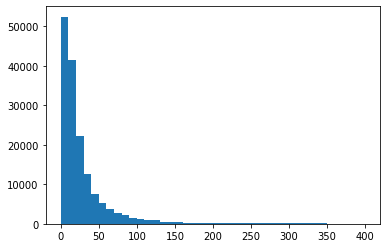

In [29]:
sentenceLength = [len(one_comment) for one_comment in list_tokenized_train]

plt.hist(sentenceLength, bins = np.arange(0, 410, 10))

In [31]:
# We can take a safe bet on the max length of the sentence by taking the number 3 std dev away from the mean
np.mean(sentenceLength) + 3*np.std(sentenceLength)

172.82679041821748

In [32]:
from keras.preprocessing.sequence import pad_sequences

max_sen_len = 173

X_train = pad_sequences(list_tokenized_train, maxlen = max_sen_len)
X_test = pad_sequences(list_tokenized_test, maxlen = max_sen_len)

In [33]:
X_train

array([[    0,     0,     0, ...,  3607,  1762,   747],
       [    0,     0,     0, ...,   394,  6785,    82],
       [    0,     0,     0, ...,   566,   525,   288],
       ...,
       [    0,     0,     0, ...,  2232, 10129,  3220],
       [    0,     0,     0, ...,   182,    20,    25],
       [    0,     0,     0, ...,   203,    29,   820]], dtype=int32)

In [34]:
max_features

20000

### Building the LSTM model

In [37]:
from keras.layers import Dense, Dropout, Input, LSTM, Embedding, Activation
from keras.layers import GlobalMaxPool1D, Bidirectional
from keras.models import Model
from keras.models import Sequential

from keras import initializers, optimizers, regularizers, constraints, layers

model = Sequential()


# Embedding takes input dimension, output dimension, input maximum length
embedding = Embedding(max_features, # max_features are 20000 in number
                      128, 
                      input_length = max_sen_len)
model.add(embedding)
# The embedding layer outputs a 3-D matrix of dimensions None*173*128
# None indicates that its size is inferred
# 173 is the sequence length 
# 128 indicates that for each of the 173 words in the sequence we have 128 coordinates associated with each word in the sequence


# LSTM layer takes the output of embedding layer and generates a matrix of None*173*60 where 60 is taken as the output dimension
model.add(LSTM(60, return_sequences = True))


# Using Max Pooling to reduce dimensions from 3D to 2D
model.add(GlobalMaxPool1D())


# Now adding Dense and Dropout layers
model.add(Dropout(0.1))
model.add(Dense(50, activation = "relu"))
model.add(Dropout(0.1))

# Adding the final Dense layer with 6 classes and sigmoid activation function
model.add(Dense(6, activation="sigmoid"))

# Since we are tackling binary classification problem we use loss as binary_crossentropy
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])
# The default learning rate is 0.001

In [56]:
# To check for correct input and output dimensions for each layer
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 173, 128)          2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 173, 60)           45360     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                

In [58]:
# To view any layer's output
from keras import backend as K

get_3rd_layer_output = K.function([model.layers[0].input],
                                 [model.layers[2].output])

# Passing one comment and checking the output 
layer_output = get_3rd_layer_output([X_train[:1]])[0]
layer_output.shape

(1, 60)

In [39]:
# Running the model with 10% validation set

# 32 sentences/comments will be passed in each batch
batch_size = 32 

# 2 iterations
epochs = 2

model.fit(X_train, all_train_classes_values, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/2
4488/4488 [==============================] - 470s 104ms/step - loss: 0.1030 - accuracy: 0.8616 - val_loss: 0.0524 - val_accuracy: 0.9935
Epoch 2/2
4488/4488 [==============================] - 464s 103ms/step - loss: 0.0461 - accuracy: 0.9906 - val_loss: 0.0489 - val_accuracy: 0.9921


**Accuracy of the training and validation sets are good so we can proceed with prediction**

In [42]:
y_pred = model.predict(X_test)
y_pred

array([[9.96445179e-01, 3.80684912e-01, 9.63824749e-01, 8.36560726e-02,
        8.61120343e-01, 2.60927022e-01],
       [4.46379185e-03, 1.28141655e-05, 6.39826059e-04, 2.56816311e-05,
        5.54412603e-04, 5.24178613e-05],
       [6.90054893e-03, 2.54522656e-05, 1.07726455e-03, 4.77190406e-05,
        1.02388859e-03, 7.63842909e-05],
       ...,
       [7.92413950e-04, 9.06834146e-07, 1.04468796e-04, 1.90293440e-06,
        5.51021876e-05, 5.69953681e-06],
       [6.26331568e-03, 9.44863586e-06, 3.76433134e-04, 4.43788740e-05,
        4.89950180e-04, 1.14365859e-04],
       [9.67952430e-01, 5.54042161e-02, 8.36586058e-01, 8.57654214e-03,
        5.92047453e-01, 4.15937901e-02]], dtype=float32)

In [43]:
sample_submission[list_classes] = y_pred
sample_submission.head(10)

id     toxic  severe_toxic   obscene    threat    insult  \
0  00001cee341fdb12  0.996445  3.806849e-01  0.963825  0.083656  0.861120   
1  0000247867823ef7  0.004464  1.281417e-05  0.000640  0.000026  0.000554   
2  00013b17ad220c46  0.006901  2.545227e-05  0.001077  0.000048  0.001024   
3  00017563c3f7919a  0.003382  4.669984e-06  0.000375  0.000010  0.000303   
4  00017695ad8997eb  0.004517  8.287622e-06  0.000742  0.000015  0.000491   
5  0001ea8717f6de06  0.004760  1.505294e-05  0.000609  0.000039  0.000581   
6  00024115d4cbde0f  0.014133  1.139462e-05  0.001029  0.000034  0.001033   
7  000247e83dcc1211  0.515687  5.395144e-03  0.070523  0.008748  0.157447   
8  00025358d4737918  0.251753  2.952218e-04  0.028471  0.000843  0.038766   
9  00026d1092fe71cc  0.000969  5.357930e-07  0.000088  0.000001  0.000050   

   identity_hate  
0       0.260927  
1       0.000052  
2       0.000076  
3       0.000027  
4       0.000034  
5       0.000072  
6       0.000115  
7       0.025807  
8       0.002595  
9       0.000005

In [48]:
list_classes

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [52]:
# Adding a threshold of 0.5 for each category
def threshold_conversion(x):
    output = 0
    if x>0.5:
        output = 1
    else:
        ouput = 0
    return output

sample_submission['toxic'] = sample_submission['toxic'].apply(lambda x: threshold_conversion(x))
sample_submission['severe_toxic'] = sample_submission['severe_toxic'].apply(lambda x: threshold_conversion(x))
sample_submission['obscene'] = sample_submission['obscene'].apply(lambda x: threshold_conversion(x))
sample_submission['threat'] = sample_submission['threat'].apply(lambda x: threshold_conversion(x))
sample_submission['insult'] = sample_submission['insult'].apply(lambda x: threshold_conversion(x))
sample_submission['identity_hate'] = sample_submission['identity_hate'].apply(lambda x: threshold_conversion(x))
sample_submission.head(10)

id  toxic  severe_toxic  obscene  threat  insult  \
0  00001cee341fdb12      1             0        1       0       1   
1  0000247867823ef7      0             0        0       0       0   
2  00013b17ad220c46      0             0        0       0       0   
3  00017563c3f7919a      0             0        0       0       0   
4  00017695ad8997eb      0             0        0       0       0   
5  0001ea8717f6de06      0             0        0       0       0   
6  00024115d4cbde0f      0             0        0       0       0   
7  000247e83dcc1211      1             0        0       0       0   
8  00025358d4737918      0             0        0       0       0   
9  00026d1092fe71cc      0             0        0       0       0   

   identity_hate  
0              0  
1              0  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  
8              0  
9              0

## References:

1. https://www.kaggle.com/muhardianabasandi/lstm-jigsaw-toxiccomment-classification
2. https://www.kaggle.com/sbongo/for-beginners-tackling-toxic-using-keras
3. https://www.kaggle.com/jhoward/improved-lstm-baseline-glove-dropout
4. https://www.kaggle.com/sbongo/do-pretrained-embeddings-give-you-the-extra-edge/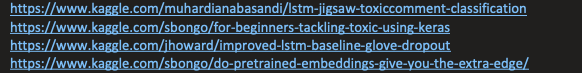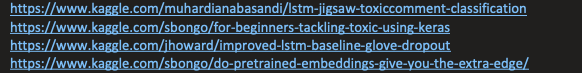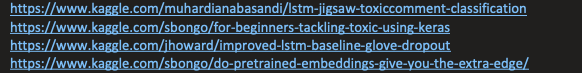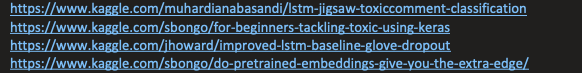